<a href="https://colab.research.google.com/github/AKASH4671/AI-Powered-Portfolio-Optimization-and-Risk-Management/blob/main/2_portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

**Setup**

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Define project path
project_path = "/content/drive/MyDrive/Colab Notebooks/Finance Projects/AI-Powered-Portfolio-Optimization-and-Risk-Management/"

#Load saved data from Step 1
tickers = ['AAPL', 'MSFT', 'AMZN', 'JPM', 'GS', 'XOM', 'JNJ', 'NVDA', 'WMT', 'UNH']
mean_returns = pd.read_csv(project_path + "data/mean_returns.csv", index_col=0).squeeze()
cov_matrix = pd.read_csv(project_path + "data/cov_matrix.csv", index_col=0)


Mounted at /content/drive


**STEP 2.1 — Generate Efficient Frontier (Random Portfolios)**

In [3]:
# Number of portfolios to simulate
num_portfolios = 10_000
results = np.zeros((3, num_portfolios))
weights_record = []

# Loop through portfolios
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize to 1
    weights_record.append(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_stddev

    results[0,i] = portfolio_stddev
    results[1,i] = portfolio_return
    results[2,i] = sharpe_ratio

# Convert results to DataFrame
results_df = pd.DataFrame(results.T, columns=['Volatility', 'Return', 'Sharpe Ratio'])
weights_df = pd.DataFrame(weights_record, columns=tickers)


In [4]:
print(results_df.head())
print("-------------------------------------------------------------------------")
print(weights_df.head())

   Volatility    Return  Sharpe Ratio
0    0.012896  0.000957      0.074177
1    0.014023  0.001094      0.078002
2    0.013598  0.001129      0.083011
3    0.015424  0.001343      0.087042
4    0.014343  0.001259      0.087802
-------------------------------------------------------------------------
       AAPL      MSFT      AMZN       JPM        GS       XOM       JNJ  \
0  0.102643  0.098165  0.043552  0.116326  0.138884  0.191277  0.030249   
1  0.167178  0.003213  0.009361  0.059455  0.164159  0.190550  0.075341   
2  0.088072  0.136382  0.048702  0.044710  0.123432  0.115740  0.102694   
3  0.011815  0.001299  0.168086  0.072593  0.016686  0.147427  0.229041   
4  0.090289  0.187277  0.029202  0.152887  0.006409  0.063546  0.197277   

       NVDA       WMT       UNH  
0  0.077202  0.064360  0.137342  
1  0.105237  0.020245  0.205262  
2  0.153044  0.120673  0.066552  
3  0.170521  0.030621  0.151911  
4  0.044769  0.143261  0.085083  


**STEP 2.2 — Plot the Efficient Frontier**

/tmp/ipython-input-5-2417673842.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_sharpe_port[0], max_sharpe_port[1], marker='*', color='r', s=300, label='Max Sharpe')
/tmp/ipython-input-5-2417673842.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[0], min_vol_port[1], marker='X', color='black', s=300, label='Min Volatility')


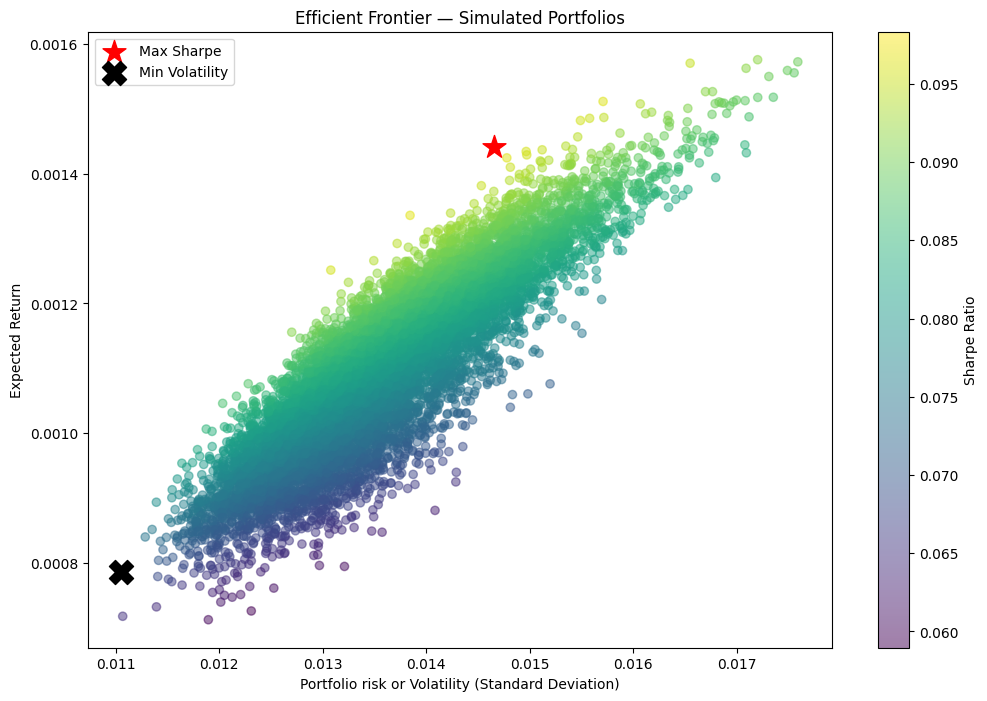

In [5]:
# Find portfolio with max Sharpe and min Volatility
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
min_vol_idx = results_df['Volatility'].idxmin()

# Corresponding values
max_sharpe_port = results_df.loc[max_sharpe_idx]
min_vol_port = results_df.loc[min_vol_idx]

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(results_df['Volatility'], results_df['Return'],
                      c=results_df['Sharpe Ratio'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.xlabel('Portfolio risk or Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier — Simulated Portfolios')

# Highlight Optimal Points
plt.scatter(max_sharpe_port[0], max_sharpe_port[1], marker='*', color='r', s=300, label='Max Sharpe')
plt.scatter(min_vol_port[0], min_vol_port[1], marker='X', color='black', s=300, label='Min Volatility')
plt.legend()

# Save plot
os.makedirs(project_path + "plots", exist_ok=True)
plt.savefig(project_path + "plots/efficient_frontier.png")
plt.show()


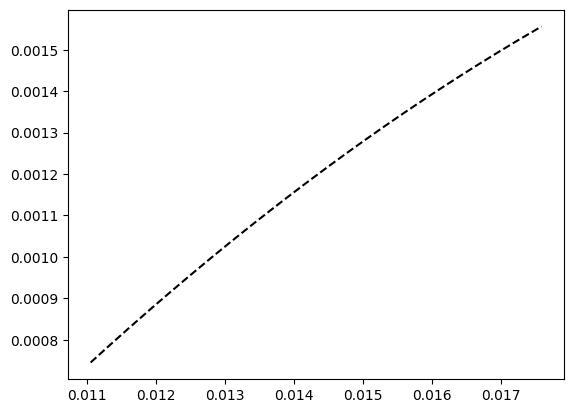

In [9]:
from numpy.polynomial.polynomial import Polynomial

coefs = Polynomial.fit(results[0], results[1], deg=2)
x_vals = np.linspace(min(results[0]), max(results[0]), 500)
y_vals = coefs(x_vals)

plt.plot(x_vals, y_vals, color='black', linestyle='--', label='Fitted Efficient Frontier')

**STEP 2.3 — Display Portfolio Weights for Optimal Portfolios**

In [10]:
print("🔺 Max Sharpe Ratio Portfolio:")
display(weights_df.loc[max_sharpe_idx])

print("🔻 Minimum Volatility Portfolio:")
display(weights_df.loc[min_vol_idx])

🔺 Max Sharpe Ratio Portfolio:


,695
AAPL,0.108121
MSFT,0.048866
AMZN,0.126871
JPM,0.026779
GS,0.027525
XOM,0.002975
JNJ,0.240558
NVDA,0.083129
WMT,0.317868
UNH,0.017309


🔻 Minimum Volatility Portfolio:


,2915
AAPL,0.002800
MSFT,0.028449
AMZN,0.047285
JPM,0.214533
GS,0.048957
XOM,0.135989
JNJ,0.019080
NVDA,0.162340
WMT,0.237414
UNH,0.103154


**Plot Portfolio Weights**

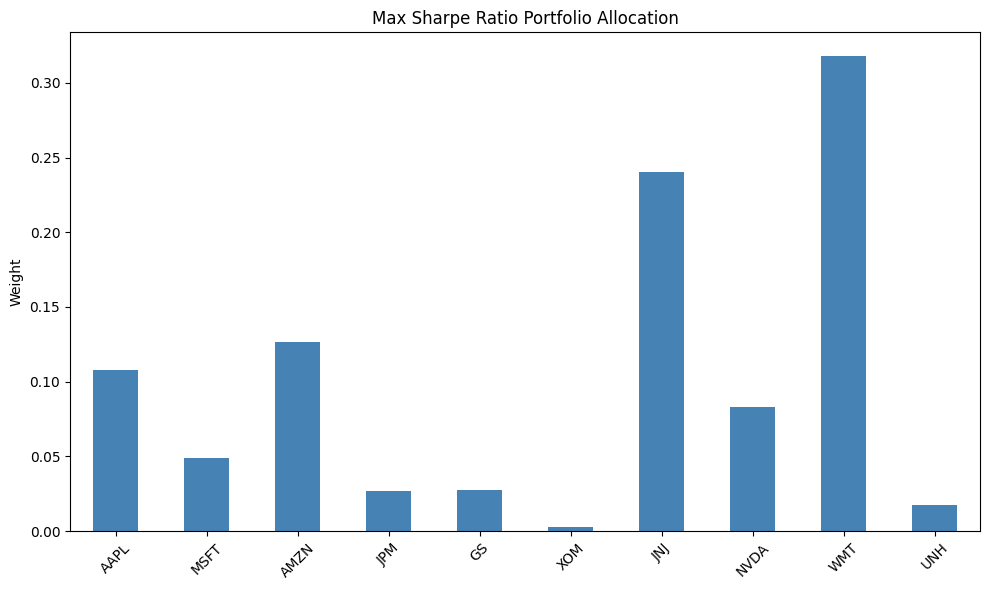

In [11]:
# Plot weights for Max Sharpe Portfolio
weights_df.loc[max_sharpe_idx].plot(kind='bar', figsize=(10,6), color='steelblue')
plt.title("Max Sharpe Ratio Portfolio Allocation")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(project_path + "plots/portfolio_weights.png")
plt.show()


**save the optimal weight sharpe**

In [25]:
# 1. Create folder if not exists
data_output_path = project_path + "data"
os.makedirs(data_output_path, exist_ok=True)

# 3. Save Optimal Portfolio Weights (Max Sharpe)
# Directly access weights from the weights_record list
optimal_weights_sharpe = weights_record[max_sharpe_idx]
weights_sharpe_df = pd.DataFrame({
    'Ticker': tickers,
    'Weight': optimal_weights_sharpe
})
weights_sharpe_df.to_csv(data_output_path + "/optimal_weights_sharpe.csv", index=False)

# (Optional) Save min_vol weights too if needed later
# Directly access weights from the weights_record list
optimal_weights_min_vol = weights_record[min_vol_idx]
weights_minvol_df = pd.DataFrame({
    'Ticker': tickers,
    'Weight': optimal_weights_min_vol
})
weights_minvol_df.to_csv(data_output_path + "/optimal_weights_minvol.csv", index=False)

print("Saved the following for Step 3:")
print("- optimal_weights_sharpe.csv")
print("- optimal_weights_minvol.csv")

Saved the following for Step 3:
- optimal_weights_sharpe.csv
- optimal_weights_minvol.csv


In [24]:
# Folder to save data
output_path = "/content/drive/MyDrive/Colab Notebooks/Finance Projects/AI-Powered-Portfolio-Optimization-and-Risk-Management/data"

# Save optimal weights as DataFrame (using a new variable name)
optimal_weights_sharpe_df = pd.DataFrame({
    'Ticker': tickers,
    'Weight': weights_record[max_sharpe_idx] # Use weights of the max sharpe portfolio from the original records
})
optimal_weights_sharpe_df.to_csv(f"{output_path}/optimal_weights_sharpe.csv", index=False)

print("Saved optimal_weights_sharpe.csv to Google Drive.")

Saved optimal_weights_sharpe.csv to Google Drive.
